In [8]:
pip install mediapipe

In [9]:
import mediapipe as mp

In [10]:
import cv2
from google.colab.patches import cv2_imshow


In [12]:
import numpy as np

In [13]:
file = '/content/hand.png'

In [14]:
img = cv2.imread(file)  #이미지파일 읽기
img2= np.copy(img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



In [16]:
mp_hand = mp.solutions.hands   #손모듈초기화
mp_drawing = mp.solutions.drawing_utils #이미지검출

In [17]:
hand = mp_hand.Hands(static_image_mode=True, max_num_hands=1)  #손 1개 ,정적이미지모드 가 faise면 ㅂ디오

In [18]:
results = hand.process(img_rgb)  #이미지에서 손을 감지하고 감지된 손의 정보를 결과에 저장

In [19]:
print(len(results.multi_hand_landmarks)) #손 감지결과를 개수로 출력

1


In [22]:
landmarks = results.multi_hand_landmarks[0] #0번째 손의 랜드마크정보 보기

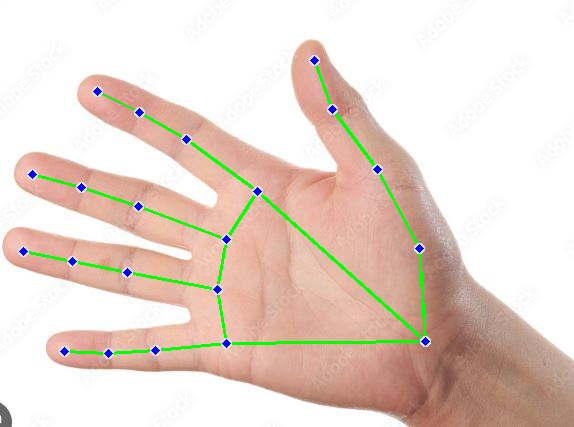

In [23]:

mp_drawing.draw_landmarks(    #손 랜드마크를 시각적으로 표시
        img2,                 #img2에 손의 랜드마크를 그린다.
        landmarks,
        mp_hand.HAND_CONNECTIONS, #랜드마크간의 연결설정
        mp_drawing.DrawingSpec((255, 0, 0), thickness=3, circle_radius=2), #thickness=3선의 두께
        mp_drawing.DrawingSpec((0, 255, 0), thickness=2, circle_radius=2))
cv2_imshow(img2)


In [24]:
hand_landmarks = results.multi_hand_landmarks[0].landmark   #감지된 손의 첫번째 랜드마크정보
print(hand_landmarks[mp_hand.HandLandmark.THUMB_TIP])       #감지된 손의 엄지손가락 끝부분 좌표(x,y,z좌료)

x: 0.5475203394889832
y: 0.14199286699295044
z: -0.10619144141674042



In [25]:
thumb_tip = hand_landmarks[mp_hand.HandLandmark.PINKY_TIP]   # 첫번째 손의 핀키팁(새끼손가락 끝부분)정보를 변수에 저장
index_tip = hand_landmarks[mp_hand.HandLandmark.INDEX_FINGER_TIP] # 첫번째 손의 인덱스 핑거팁(검지손가락끝부분) 랜드마크정보를 변수에 저장(검지손)

In [27]:
landmarks = results.multi_hand_landmarks[0].landmark #감지된 첫번째 손의 모든정보
if landmarks:
  for landmark in landmarks:
    print(landmark)

x: 0.741455614566803
y: 0.8007506132125854
z: 8.746191042519058e-07

x: 0.7315000295639038
y: 0.5828601717948914
z: -0.06052323430776596

x: 0.6570228338241577
y: 0.3967474400997162
z: -0.0786239504814148

x: 0.5784283876419067
y: 0.2554281949996948
z: -0.0924687534570694

x: 0.5475203394889832
y: 0.14199286699295044
z: -0.10619144141674042

x: 0.44857650995254517
y: 0.4494403898715973
z: -0.03501610457897186

x: 0.3240694999694824
y: 0.3276691436767578
z: -0.06390253454446793

x: 0.24300658702850342
y: 0.2638862431049347
z: -0.09250743687152863

x: 0.16976210474967957
y: 0.2146047055721283
z: -0.11730558425188065

x: 0.39523857831954956
y: 0.5603142976760864
z: -0.03367101773619652

x: 0.24052701890468597
y: 0.48369714617729187
z: -0.06168362870812416

x: 0.14143529534339905
y: 0.44006961584091187
z: -0.09454599022865295

x: 0.056167811155319214
y: 0.40792733430862427
z: -0.11976337432861328

x: 0.3787457346916199
y: 0.6777446866035461
z: -0.04030349478125572

x: 0.221969872713089
y: 

In [28]:
thumb = landmarks[mp_hand.HandLandmark.THUMB_TIP] #엄지손가락끝
index = landmarks[mp_hand.HandLandmark.INDEX_FINGER_TIP] #검지손가락끝

thumb_pos = tuple(np.multiply([thumb.x, thumb.y], [img.shape[1], img.shape[0]]).astype(int)) #tump.x,tumb.y 는 엄지손가락 끝부분좌표,img.shape[1],[0] 이미지의 가로크기,세로크기배역
index_pos = tuple(np.multiply([index.x, index.y], [img.shape[1], img.shape[0]]).astype(int)) #이미지의 크기에 맞게 쉐이프하는 작업(검지)
middle_pos = (abs((thumb_pos[0] + index_pos[0]) // 2), abs((thumb_pos[1] + index_pos[1]) // 2)) #엄지와 검지 손가락 끝부분 좌표를 사용하여 두 지점의 중간지점 좌표를 계산,각각x,y를 구함

print(thumb_pos)
print(index_pos)
print(middle_pos)



(314, 60)
(97, 91)
(205, 75)


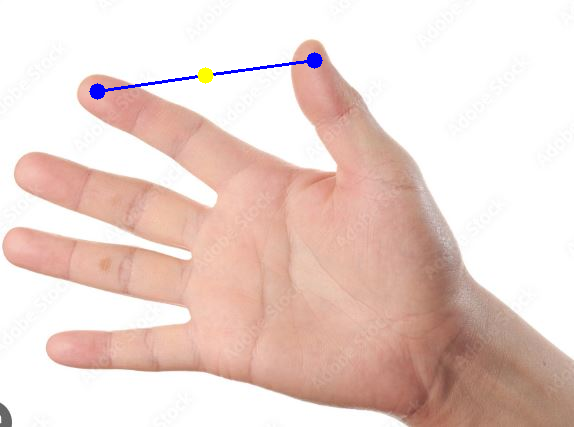

In [29]:
cv2.circle(img, (thumb_pos[0], thumb_pos[1]), 8, (255,0,0),  -1)
cv2.circle(img, (index_pos[0], index_pos[1]), 8, (255,0,0),  -1)
cv2.line(img, thumb_pos, middle_pos, (255, 0, 0), 2)
cv2.line(img, middle_pos, index_pos, (255,0,0), 2)
cv2.circle(img, (middle_pos[0], middle_pos[1]), 8, (0,255,255),  -1)
cv2_imshow(img)

219


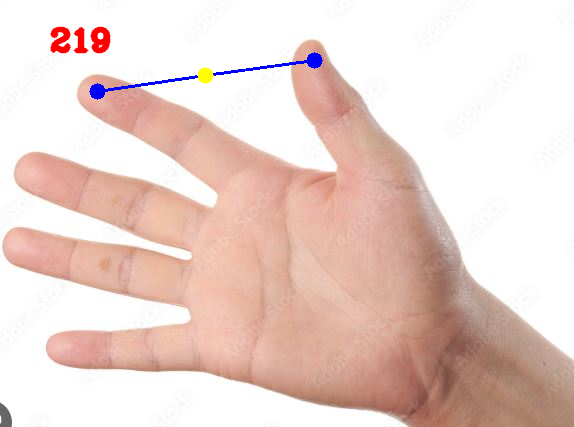

In [30]:
thumb_x, thumb_y = (thumb_pos[0], thumb_pos[1])
index_x, index_y = (index_pos[0], index_pos[1])
distance = ((index_x - thumb_x) ** 2 + (index_y - thumb_y) ** 2) ** 0.5 #두점간의 거리를 계산,x**2 + y** (검비끝-엄지끝)제곱끝(파타고라스정리의 제곱합)
print(int(distance))
cv2.putText(img, f'{int(distance)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 4, cv2.LINE_AA)
cv2_imshow(img)